# Trying to solve for Greens functions and Scanning Behaviour on the Triangular Sample

- Problem, probably not exciting at the right frequency.

In [1]:
import sys

sys.path.append("../")

In [2]:
import plasmon_modeling as PM
from dolfin import *
from fenics import *
from mshr import *
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

## Phrasing the Problem

Attempting to solve:


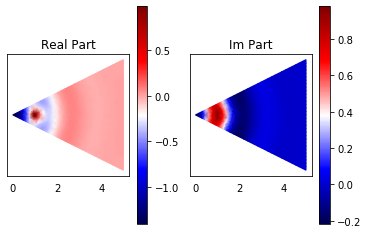

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 6), MixedElement(FiniteElement('Lagrange', triangle, 2), FiniteElement('Lagrange', triangle, 2))), 27)

In [3]:
check = PM.RectangularSample(1,1)

domain_vertices = [Point(0.0, 0.0),
                  Point(5.0, -2.50),
                  Point(5.0, 2.50)]
domain = Polygon(domain_vertices)
check.domain = domain
check.placeCircularSource(1,0,0.1)
sigma = PM.S()
omega = PM.O()

sigma.set_sigma_values(1,1)
omega.set_omega_values(1,1)

check.run(omega, sigma, density=20,to_plot=True)

## Eigenvalue Eigenfunction Pair Creation

In [5]:
eigenvalue_eigenfunction_pairs = check.eigenvalue_target_solve(1, sigma, number_extracted=10)

1


## Interpolating to store as a Eigenfunction

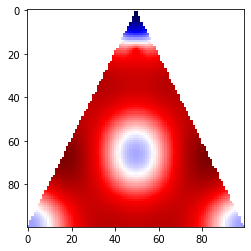

In [22]:
x_axis=np.linspace(0,5,100)
y_axis=np.linspace(-2.5,2.5,100)
mesh = check.getMesh(density=50)

processed_eigenvalue_eigenfunction_pairs = dict()

for key, value in eigenvalue_eigenfunction_pairs.items():
    processed_eigenvalue_eigenfunction_pairs[key]= PM.process_fenics_function(mesh,value,x_axis=x_axis,y_axis=y_axis)

In [14]:
processed_eigenvalue_eigenfunction_pairs[1.0343346305431782].data

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, -0.00179833, -0.00179807, ..., -0.00179809,
                nan,         nan],
       [        nan, -0.00179858, -0.00179836, ..., -0.00179839,
        -0.00179858,         nan],
       [-0.0017988 , -0.00179868, -0.00179847, ..., -0.00179847,
        -0.00179868, -0.0017988 ]])

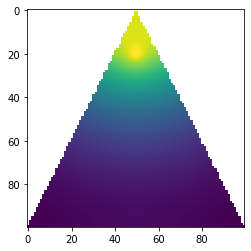

In [16]:
plt.imshow(processed_eigenvalue_eigenfunction_pairs[1.0343346305431782].data*np.array(~processed_eigenvalue_eigenfunction_pairs[1.0343346305431782].mask,dtype="float"))

### Saving Eigenvalue Eigenfunction Pairs

In [33]:
import h5py

with h5py.File("processed_tri_large_eigenvalue_eigenfunction_pairs.h5",'a') as f:
    for key, value in processed_eigenvalue_eigenfunction_pairs.items():
        f[str(key)] = np.array(value)

### Unfreezing the Eigenvalue Eigenfunction Pairs

In [18]:
def castToMaskedArray(raw_array):
    """
    Simply takes in an array with nan values and creates a np.ma.MaskedArray which is an object that
    contains the data as well as a boolean array that indicates where the nan values are.
    
    Args:
        param1: raw_array, numpy array with nan values
    
    Returns:
        np.ma.MaskedArray
    """
    return np.ma.array(raw_array,mask=np.isnan(raw_array))

In [19]:
processed_eigenvalue_eigenfunction_pairs = dict()

with h5py.File("processed_tri_eigenvalue_eigenfunction_pairs.h5",'r') as f:
    for key in list(f.keys()):
        processed_eigenvalue_eigenfunction_pairs[float(key)] = np.nan_to_num(np.array(f.get(key)))

OSError: Unable to open file (unable to open file: name = 'processed_tri_eigenvalue_eigenfunction_pairs.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Casting Raw Arrays back into Masked Arrays

In [24]:
list(processed_eigenvalue_eigenfunction_pairs.keys())[0]

1.0343346305431782

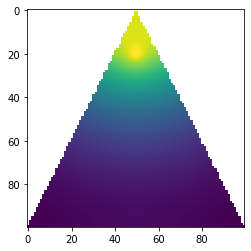

In [25]:
plt.imshow(processed_eigenvalue_eigenfunction_pairs[1.0343346305431782])

In [30]:
castToMaskedArray(processed_eigenvalue_eigenfunction_pairs[1.0343346305431782])

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, -0.0017983251208683387, -0.0017980724063824856, ...,
         -0.0017980909643156163, --, --],
        [--, -0.001798580819693514, -0.001798362059340554, ...,
         -0.0017983900366299419, -0.00179858081933984, --],
        [-0.0017987985689705984, -0.0017986819145496427,
         -0.0017984669581103218, ..., -0.0017984669577596824,
         -0.0017986819141998936, -0.0017987985686198427]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True, False, False, ..., False,  True,  True],
        [ True, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20)

In order to scan over this sample, we need to create a different matrix since the geometry of the object is more complicated. How would we implement scanning here? First create a mesh of points, then overlay on top of the dimensions of the image. Then we need a method in order to tell is something is inside an arbitrary shape. I think we should still be able to scan...

In [31]:
scanning = PM.scanning_behaviour(99,99,q=5)

In [34]:
result = PM.extract_SNOM_response(scanning, processed_eigenvalue_eigenfunction_pairs)

/home/memo/anaconda3/envs/fp0/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/memo/anaconda3/envs/fp0/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/memo/anaconda3/envs/fp0/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/memo/anaconda3/envs/fp0/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/memo/anaconda3/envs/fp0/lib/python3.7/site-packages/matplotlib/colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/memo/anaconda3/envs/fp0/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to 

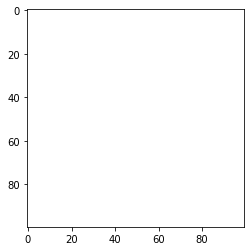

In [39]:
plt.imshow(result)